# Prepaid Plan Comparison Study: Surf vs. Ultimate in Megaline Company <a id='intro'></a>

An analyst at the telecom operator company `Megaline` was asked by the company to analyze two types of prepaid packages, namely `Surf` packages and `Ultimate` packages. The company's advertising department wanted to know which prepaid plans generated more revenue, so they could create an appropriate advertising budget.

We will conduct an initial analysis of these prepaid packages based on a relatively small sample of clients. we have 500 `Megaline` client data, which contains information such as: who they are, where they come from, what kind of package they use, and the number of calls and messages they sent in 2018. Our task is to analyze the behavior of the users, then determine which prepaid package is more profitable for `Megaline` companies.

The dataset owned by the company `Megaline` includes `'calls'`, `'internet'`, `'messages'`, `'plans'` and `'users'` which all contain important information for the analysis of this project. The purpose of this project is not only to find the most revenue from the two prepaid packages, but also to analyze user behavior such as 'call duration', 'number of sms' and 'amount of internet data usage' towards the two prepaid packages. Several hypotheses are proposed as follows:
- Is it true that `call duration` category from `Surf Plan` in a month is the most in number?
- Is it true that `sms count` category from `Surf Plan` in a month is the most in number?
- Is it true that the average amount of internet data usage per month for both types of `Prepaid Packages` is around `16 GB`?
- Is it true that the highest amount of revenue from users per month belongs to the `Ultimate Plan`?
- Is it true that the Average Income of Ultimate and Surf Prepaid Package Users is Different?
- Is the Average Income of Users in the NY-NJ Region Different from Other Regions?

# Content <a id='back'></a>

* [Intro](#intro)
* [Stage 1. Initialization](#cont_1)
* [Stage 2. Load Data](#cont_2)
* [Stage 3. Preparing Data](#cont_3)
     * [3.1 Prepaid Package](#cont_4)
     * [3.2 Users](#cont_5)
         * [3.2.1 Fixed Data](#cont_6)
         * [3.2.2 Enrich Data Quality](#cont_7)
     * [3.3 Call](#cont_8)
         * [3.3.1 Fixed Data](#cont_9)
         * [3.3.2 Enrich Data Quality](#cont_10)
     * [3.4 Messaging/SMS](#cont_11)
         * [3.4.1 Fixed Data](#cont_12)
         * [3.4.2 Enrich Data Quality](#cont_13)
     * [3.5 Internet](#cont_14)
         * [3.5.1 Fixed Data](#cont_15)
         * [3.5.2 Enrich Data Quality](#cont_16)
* [Step 4. Studying Terms and Conditions Regarding Prepaid Packages](#cont_17)
* [Step 5. Aggregating Data per User](#cont_18)
* [Step 6. Studying User Behavior](#cont_19)
     * [6.1 Call](#cont_20)
     * [6.2 Messaging/SMS](#cont_21)
     * [6.3 Internet](#cont_22)
* [Stage 7. Income](#cont_23)
* [Step 8. Testing Statistical Hypotheses](#cont_24)
     * [8.1 Hypothesis Testing 1: The Average Income of Ultimate and Surf Prepaid Package Users Is Different](#cont_25)
     * [8.2 Hypothesis Test 2: The Average Revenue of Users in the NY-NJ Region Differs from the Earnings of Users from Other Regions](#cont_26)
* [Step 9. General Conclusion](#cont_27)

## Initialization <a id= 'cont_1' ></a>

Some of the libraries used to complete this project are `pandas`, `numpy`, `matplotlib`, `seaborn`, `math` and `scypi` with explanations in them.

In [581]:
# load all libraries
import pandas as pd # process dataframe
import numpy as np # process descriptive statistics
import matplotlib.pyplot as plt # visualize data
import seaborn as sns # visualize data
import math as mt # add math functions
from scipy import stats as st # processing hypotheses

# seaborn theme set
sns.set_theme(palette='bright')

## Load Data <a id= 'cont_2' ></a>

Megaline divides data by group into several groups including: `calls`, `internet`, `messages`, `plans` and `users`. Now we will load it into `notebook`.

In [582]:
# load data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

## Preparing Data <a id= 'cont_3' ></a>

Next, let's prepare the data starting from checking the `data type`, `duplicate`, `blank value` and adding a few additional columns to facilitate analysis.

## Prepaid Package <a id= 'cont_4' ></a>

We will display information from the `plans` data group as follows:

In [583]:
# displays general information/summary about DataFrame prepaid packages
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [584]:
# displays sample data for the packages
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From the information above it shows that the data is good enough such as `data type`, `duplicate`, `missing value` and other information so no improvement is needed on the data.

## User <a id= 'cont_5' ></a>

In [585]:
# displays general information/summary about the user's DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [586]:
# displays a sample of user data
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [587]:
# check for duplicate `users` data
users.duplicated().sum()

0

From the check above it can be seen that there are `wrong data types` and `missing values`. Next is the fix for those problems.

### Fix Data <a id= 'cont_6' ></a>

Changed the wrong data type from `object` to `datetime`.

In [588]:
# fix wrong data type in date column
# change the data type of `object` to `datetime`
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

# displays `users` information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


The data type in the `reg_date` column has become the `datetime` data type.

Next, fill in the missing values in the `churn_date` column. Because the missing values are customers who are still active today and the dates recorded are only throughout 2018. So we fill in these values with the date `2018-12-31`. Then we continue by changing the data type to `date_time`.

In [589]:
# fill in missing values
users['churn_date'].fillna('2018-12-31', inplace = True)

# change the `churn_date` data type to `datetime`
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

# displays `users` information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Incorrect data types and missing values have been fixed.

### Enrich Data Quality <a id= 'cont_7' ></a>

Furthermore, to facilitate analysis, several additional columns are needed such as separating `datetime` based on `day`, `month`, `year`. Then proceed with creating the `region` column which contains whether the city originates from `'NY-NJ'` or not `'other'`.

In [590]:
# separates the datetime column

# create a day column
users['day'] = users['reg_date'].dt.day

# create month column
users['month'] = users['reg_date'].dt. month

# create a year column
users['year'] = users['reg_date'].dt. year

# displays sample data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,day,month,year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,24,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,13,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,21,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,28,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,23,5,2018


In [591]:
# create a column to separate the NY-NJ region from other regions
# checks for unique values in the `city` column
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [592]:
# create the NY-NJ region column

# create a function to check whether it originates from the `NY-NJ` region or not
def split_region(data):
     if ('NY-NJ' in data)|(data == 'NY')|(data == 'NJ'):
         return 'NY-NJ'
     else:
         return 'other'

# create a region column using the already created function
users['region'] = users['city'].apply(split_region)

# returns the value_counts of the `region` column
users['region'].value_counts()

region
other    420
NY-NJ     80
Name: count, dtype: int64

Additional columns have been made and are as expected.

## Calling <a id= 'cont_8' ></a>

In [593]:
# displays general information/summary about the calling DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [594]:
# checks whether there are duplicates in the dataset
calls.duplicated().sum()

0

In [595]:
# displays sample data containing calls
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


From checking above, it can be seen that there is `wrong data type`. Next is the fix for the problem.

### Fix Data <a id= 'cont_9' ></a>

Changed the wrong data type from `object` to `datetime`.

In [596]:
# change data type `object` to type `datetime`
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

# displays data information
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


The data type in `call_date` has been fixed to `datetime`.

### Enrich Data Quality <a id= 'cont_10' ></a>

Furthermore, to facilitate analysis, several additional columns are needed such as separating `datetime` based on `day`, `month`, `year`.

In [597]:
# separates the datetime column

# create a day column
calls['day'] = calls['call_date'].dt. day

# create month column
calls['month'] = calls['call_date'].dt. month

# create a year column
calls['year'] = calls['call_date'].dt. year

# displays sample data
calls.head()

,id,user_id,call_date,duration,day,month,year
0,1000_93,1000,2018-12-27,8.52,27,12,2018
1,1000_145,1000,2018-12-27,13.66,27,12,2018
2,1000_247,1000,2018-12-27,14.48,27,12,2018
3,1000_309,1000,2018-12-28,5.76,28,12,2018
4,1000_380,1000,2018-12-30,4.22,30,12,2018


Additional columns have been made and are as expected.

## Messaging/SMS <a id= 'cont_11' ></a>

In [598]:
# displays general information/summary about the SMS DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [599]:
# displays sample data for SMS
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [600]:
# check the number of duplicates in the data
messages.duplicated().sum()

0

From checking above, it can be seen that there is `wrong data type`. Next is the fix for the problem.

### Fix Data <a id= 'cont_12' ></a>

Changed the wrong data type from `object` to `datetime`.

In [601]:
# change the data type from `object` to `datetime`
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# displays the `messages` column information
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


The data type in the `message_date` column has been fixed to `datetime`.

### Enrich Data Quality <a id= 'cont_13' ></a>

Furthermore, to facilitate analysis, several additional columns are needed such as separating `datetime` based on `day`, `month`, `year`.

In [602]:
# separates the datetime column

# create a day column
messages['day'] = messages['message_date'].dt.day

# create month column
messages['month'] = messages['message_date'].dt. month

# create a year column
messages['year'] = messages['message_date'].dt. year

# displays sample data
messages.head()

,id,user_id,message_date,day,month,year
0,1000_125,1000,2018-12-27,27,12,2018
1,1000_160,1000,2018-12-31,31,12,2018
2,1000_223,1000,2018-12-31,31,12,2018
3,1000_251,1000,2018-12-27,27,12,2018
4,1000_255,1000,2018-12-26,26,12,2018


Additional columns have been made and are as expected.

## Internet <a id= 'cont_14' ></a>

In [603]:
# displays general information/summary about Internet DataFrames
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [604]:
# displays sample data for internet traffic
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [605]:
# check for duplicates in the `internet` dataset
internet.duplicated().sum()

0

From checking above, it can be seen that there is `wrong data type`. Next is the fix for the problem.

### Fix Data <a id= 'cont_15' ></a>

Changed the wrong data type from `object` to `datetime`.

In [606]:
# change the data type in the `session_date` column to the `datetime` data type
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

# display the `internet` dataframe information
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


The data type in the `session_date` column has been fixed to `datetime`.

### Enrich Data Quality <a id= 'cont_16' ></a>

Furthermore, to facilitate analysis, several additional columns are needed such as separating `datetime` based on `day`, `month`, `year`.

In [607]:
# separates the datetime column

# create a day column
internet['day'] = internet['session_date'].dt.day

# create month column
internet['month'] = internet['session_date'].dt. month

# create a year column
internet['year'] = internet['session_date'].dt. year

# displays sample data
internet.head()

,id,user_id,session_date,mb_used,day,month,year
0,1000_13,1000,2018-12-29,89.86,29,12,2018
1,1000_204,1000,2018-12-31,0.00,31,12,2018
2,1000_379,1000,2018-12-28,660.40,28,12,2018
3,1000_413,1000,2018-12-26,270.99,26,12,2018
4,1000_442,1000,2018-12-27,880.22,27,12,2018


Additional columns have been made and are as expected.

## Study the Terms and Conditions Related to Prepaid Packages <a id= 'cont_17' ></a>

Let's study the terms and conditions related to Prepaid Packages based on the `plans` dataframe. Let's display the dataframe again.

In [608]:
# displays the terms of the prepaid package
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


From the information above we can conclude that:
- `Package` consists of two types, namely `Surf Plan` and `Ultimate Plan`
- Each package has facilities that are provided when we buy the package and if the facility runs out, an 'additional fee' will be charged which is calculated based on the unit usage fee multiplied by the number of uses.
- Some of the facilities and amounts provided when we choose a prepaid package are listed in the `messages_included`, `mb_per_month_included` and `minutes_included` columns.
- The monthly package fee is listed in the `usd_monthly_pay` column.
- Additional fees charged if the main facility has been used up by category by multiplying the number of categories used by the category units charged are listed in the `usd_per_gb`, `usd_per_message` and `usd_per_minute` columns.

## Aggregating Data per User <a id= 'cont_18' ></a>

After the data pre-processing stage, we will continue by aggregating data to make it easier to analyze. Some of the steps include:
1. Aggregation of each dataframe based on `user_id` includes desired data such as `amount` or `counting` performed by users during 2018.
2. Create a column to calculate the number of active months for each user.
3. Create a column for the number of user data for one year divided by the number of active months of the user to get the average user data for a month in each dataframe.
4. Create a new dataframe by combining all the user's needs for `user_id` for a month both `call`, `sms`, `internet` and add a column for the user package purchased by `plans`.
5. Calculate additional costs if the facilities available in the package run out and calculate the total cost per user.
6. Filter the dataframe according to the dataset needed for further analysis.

In [609]:
# calculate the number of calls made by each user per month.

# create a pivot_table for the number of calls users made in 2018
call_count = pd.pivot_table(calls, index = 'user_id', values = 'call_date', aggfunc = 'count').reset_index()

# create a function to calculate the number of active months per user
def month_calls(user):
    slicer = calls. query('user_id == @user')
    total = len(slicer['month'].unique())
    return total

# implement the function of calculating each user's active months into a new column
call_count['call_month'] = call_count['user_id'].apply(month_calls)

# calculate the number of user calls for one month
call_count['call_per_month'] = call_count['call_date']/call_count['call_month']

# round off the number of user calls for a month
call_count['call_per_month'] = call_count['call_per_month'].apply(lambda x: mt. ceil(x))

# rename column `call_date` to column name `count_call`
call_count.rename(columns={'call_date':'count_call'},inplace=True)

# make column `user_id` index
call_count.set_index('user_id',inplace = True)

# displays sample data
call_count.head()

,count_call,call_month,call_per_month
user_id,,,
1000,16,1,16
1001,261,5,53
1002,113,3,38
1003,149,1,149
1004,370,8,47


In [610]:
# calculate the number of minutes spent by each user on calls per month.

# create a pivot_table for call durations users made in 2018
call_min = pd.pivot_table(calls, index = 'user_id', values = 'duration', aggfunc = 'sum').reset_index()

# implement the function of calculating each user's active months into a new column
call_min['count_month'] = call_min['user_id'].apply(month_calls)

# calculates the duration of a user's call for one month
call_min['min_per_month'] = call_min['duration']/call_min['count_month']

# rename column `duration` to column name `sum_duration`
call_min.rename(columns={'duration':'sum_duration'},inplace = True)

# make column `user_id` index
call_min.set_index('user_id', inplace = True)

# displays sample data
call_min.head()

,sum_duration,count_month,min_per_month
user_id,,,
1000,116.83,1,116.830000
1001,1640.46,5,328.092000
1002,777.13,3,259.043333
1003,1041.00,1,1041.000000
1004,2618.95,8,327.368750


In [611]:
# calculate the number of SMS sent by each user per month.

# create a pivot_table for the number of sms users did in 2018
message_count = pd.pivot_table(messages, index = 'user_id', values = 'message_date', aggfunc = 'count').reset_index()

# create a function to calculate the number of active months per user
def month_sms(user):
    slice = messages.query('user_id == @user')
    total = len(slice['month'].unique())
    return total

# implement the function of calculating each user's active months into a new column
message_count['count_month'] = message_count['user_id'].apply(month_sms)

# calculate the number of SMS users for one month
message_count['sms_per_month'] = message_count['message_date']/message_count['count_month']

# Round up the number of SMS users for one month
message_count['sms_per_month'] = message_count['sms_per_month'].apply(lambda x: mt. ceil(x))

# rename column `message_date` to column name `count_sms`
message_count.rename(columns = {'message_date':'count_sms'}, inplace = True)

# make column `user_id` index
message_count.set_index('user_id', inplace = True)

# displays sample data
message_count.head()

,count_sms,count_month,sms_per_month
user_id,,,
1000,11,1,11
1001,207,5,42
1002,88,3,30
1003,50,1,50
1004,177,8,23


In [612]:
# calculate the volume of internet traffic used by each user per month.

# create a pivot_table for the amount of internet data that users do in 2018
internet_count = pd.pivot_table(internet, index = 'user_id', values = 'mb_used', aggfunc = 'sum').reset_index()

# create a function to calculate the number of active months per user
def month_internet(user):
    slice = internet.query('user_id == @user')
    total = len(slice['month'].unique())
    return total

# implement the function of calculating each user's active months into a new column
internet_count['count_month'] = internet_count['user_id'].apply(month_internet)

# calculate the amount of user internet data for one month
internet_count['mb_per_month'] = internet_count['mb_used']/internet_count['count_month']

# make column `user_id` index
internet_count.set_index('user_id', inplace = True)

# displays sample data
internet_count.head()

,mb_used,count_month,mb_per_month
user_id,,,
1000,1901.47,1,1901.47000
1001,80437.94,5,16087.58800
1002,40293.33,3,13431.11000
1003,27044.14,1,27044.14000
1004,156352.81,8,19544.10125


After the aggregation process for each dataframe has been carried out, we create a new dataframe and combine it with some of the datasets that we need from the previous dataframe.

In [613]:
# combine call data, minutes, SMS and internet based on user_id and month (month)

# create a new dataframe based on the all users dataframe `users` dataframe
user_usage = pd.DataFrame(users)

# filters the selected datasets namely `user_id` and `region`
user_usage = user_usage[['user_id','region']]

# make column `user_id` index
user_usage.set_index('user_id',inplace = True)

# merge selected datasets from other dataframes into the new dataframe
user_usage['call_per_month'] = call_count['call_per_month']
user_usage['min_per_month'] = call_min['min_per_month']
user_usage['sms_per_month'] = message_count['sms_per_month']
user_usage['mb_per_month'] = internet_count['mb_per_month']

# reset the index on the new dataframe
user_usage.reset_index(inplace = True)

# displays the new sample dataframe
user_usage.head()

,user_id,region,call_per_month,min_per_month,sms_per_month,mb_per_month
0,1000,other,16.0,116.830000,11.0,1901.47000
1,1001,other,53.0,328.092000,42.0,16087.58800
2,1002,other,38.0,259.043333,30.0,13431.11000
3,1003,other,149.0,1041.000000,50.0,27044.14000
4,1004,other,47.0,327.368750,23.0,19544.10125


Next, we add the `Prepaid Package` information purchased by each user in the new dataframe. So that the `user_id` column is not lost when doing `set_index`, we make a duplicate of it first.

In [614]:
# added prepaid package information

# duplicate dataset 'user_id' which will be used as index
user_usage['user_id_index'] = user_usage['user_id']

# make the `user_id` column an index in the `users` and `user_usage` dataframes
users.set_index('user_id',inplace = True)
user_usage.set_index('user_id',inplace = True)

# merge selected datasets from other dataframes into the new dataframe
user_usage['plan'] = users['plan']

# displays the new sample dataframe
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,user_id_index,plan
user_id,,,,,,,
1000,other,16.0,116.830000,11.0,1901.47000,1000,ultimate
1001,other,53.0,328.092000,42.0,16087.58800,1001,surf
1002,other,38.0,259.043333,30.0,13431.11000,1002,surf
1003,other,149.0,1041.000000,50.0,27044.14000,1003,surf
1004,other,47.0,327.368750,23.0,19544.10125,1004,surf


Next, we will check whether or not there are missing values in the new `user_usage` dataframe.

In [615]:
# check for missing values
user_usage.isna().sum()

region             0
call_per_month    19
min_per_month     19
sms_per_month     98
mb_per_month      11
user_id_index      0
plan               0
dtype: int64

There are some `missing values` in some datasets. Let's fix the missing value by filling it with the value `'0'` because the user doesn't take advantage of the facility.

In [616]:
# fix missing values
user_usage. fillna(0,inplace = True)

# change the data type from `float` to `integer` for sms and number of calls
user_usage['call_per_month'] = user_usage['call_per_month'].astype('int')
user_usage['sms_per_month'] = user_usage['sms_per_month'].astype('int')

# displays sample data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,user_id_index,plan
user_id,,,,,,,
1000,other,16,116.830000,11,1901.47000,1000,ultimate
1001,other,53,328.092000,42,16087.58800,1001,surf
1002,other,38,259.043333,30,13431.11000,1002,surf
1003,other,149,1041.000000,50,27044.14000,1003,surf
1004,other,47,327.368750,23,19544.10125,1004,surf


The dataframe is good enough, in the `min_per_month` and `mb_per_month` columns we will round them later.

Next, we will find out how much income each user receives based on the package purchased and also additional fees if the facilities from the package purchased have run out. Let's do the math.

In [617]:
# calculate monthly income for each user

# duplicate column 'plan' to prevent column loss due to set_index
user_usage['plan_index'] = user_usage['plan']

# change the indexes on the user_usage and plans datasets
user_usage.set_index('plan', inplace = True)
plans.set_index('plan_name', inplace = True)

# combine call duration, sms and free data from available packages into a new dataframe
user_usage['minutes_included'] = plans['minutes_included']
user_usage['messages_included'] = plans['messages_included']
user_usage['mb_per_month_included'] = plans['mb_per_month_included']

# combine additional costs for call duration, sms and data into a new dataframe
user_usage['usd_monthly_pay'] = plans['usd_monthly_pay']
user_usage['usd_per_minute'] = plans['usd_per_minute']
user_usage['usd_per_message'] = plans['usd_per_message']
user_usage['usd_per_gb'] = plans['usd_per_gb']

# change column names from 'user_id_index' to 'user_id' and 'plan_index' to 'plan'
user_usage.rename(columns={
     'user_id_index':'user_id',
     'plan_index':'plan'
     },inplace = True)

# make column `user_id` index
user_usage.set_index('user_id',inplace = True)

# displays sample data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
user_id,,,,,,,,,,,,,
1000,other,16,116.830000,11,1901.47000,ultimate,3000,1000,30720,70,0.01,0.01,7
1001,other,53,328.092000,42,16087.58800,surf,500,50,15360,20,0.03,0.03,10
1002,other,38,259.043333,30,13431.11000,surf,500,50,15360,20,0.03,0.03,10
1003,other,149,1041.000000,50,27044.14000,surf,500,50,15360,20,0.03,0.03,10
1004,other,47,327.368750,23,19544.10125,surf,500,50,15360,20,0.03,0.03,10


In [618]:
# make details of additional costs outside the package

# additional charge for call duration per user per month
user_usage['add_price_call'] = (user_usage['min_per_month'] - user_usage['minutes_included']) * user_usage['usd_per_minute']

# additional charge for the number of sms per user per month
user_usage['add_price_message'] = (user_usage['sms_per_month'] - user_usage['messages_included']) * user_usage['usd_per_message']

# additional fees for the amount of internet data per user per month
# calculate the difference and convert the amount of data from MB to GB
#1GB = 1024MB
user_usage['add_price_internet'] = (user_usage['mb_per_month'] - user_usage['mb_per_month_included'])/1024
# rounding the amount of user internet data per month
user_usage['add_price_internet'] = user_usage['add_price_internet'].apply(lambda x: mt. ceil(x))
# calculates the additional cost of the user's internet data per month
user_usage['add_price_internet'] = user_usage['add_price_internet'] * user_usage['usd_per_gb']

# removes the negative charge to 0, we take the positive charge
user_usage.loc[user_usage['add_price_call'] < 0,'add_price_call'] = 0
user_usage.loc[user_usage['add_price_message'] < 0, 'add_price_message'] = 0
user_usage.loc[user_usage['add_price_internet'] < 0, 'add_price_internet'] = 0

# create internet data column 'gb_per_month'
#1GB = 1024MB
user_usage['gb_per_month'] = user_usage['mb_per_month']/1024
user_usage['gb_per_month'] = user_usage['gb_per_month'].apply(lambda x: mt. ceil(x))

# round call duration 'min_per_month'
user_usage['min_per_month'] = user_usage['min_per_month'].apply(lambda x: mt. ceil(x))

# displays sample data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb,add_price_call,add_price_message,add_price_internet,gb_per_month
user_id,,,,,,,,,,,,,,,,,
1000,other,16,117,11,1901.47000,ultimate,3000,1000,30720,70,0.01,0.01,7,0.00,0.0,0,2
1001,other,53,329,42,16087.58800,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,10,16
1002,other,38,260,30,13431.11000,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,0,14
1003,other,149,1041,50,27044.14000,surf,500,50,15360,20,0.03,0.03,10,16.23,0.0,120,27
1004,other,47,328,23,19544.10125,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,50,20


Next, we add up all the income from each user based on their needs per month. Then proceed with filtering the dataframe column based on the required column for further analysis.

In [619]:
# add up all the total revenue from users per month
user_usage['user_amount'] = user_usage['usd_monthly_pay'] + user_usage['add_price_call'] + user_usage['add_price_message'] + user_usage['add_price_internet']

# filter the dataframe for the columns needed for further analysis
user_usage = user_usage[['region','call_per_month','min_per_month','sms_per_month','gb_per_month','plan','user_amount']]

# displays sample data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,gb_per_month,plan,user_amount
user_id,,,,,,,
1000,other,16,117,11,2,ultimate,70.00
1001,other,53,329,42,16,surf,30.00
1002,other,38,260,30,14,surf,20.00
1003,other,149,1041,50,27,surf,156.23
1004,other,47,328,23,20,surf,70.00


The new dataframe is very good at seeing the monthly user needs along with the monthly income we receive from each user. However, we cannot see user behavior and determine which `Prepaid Package` is better. Let's analyze further.

## Study User Behavior <a id= 'cont_19' ></a>

Next, we will perform data processing to get an overview of user behavior based on several categories, including based on `Calls`, `SMS`, `Internet` and `Revenue` for the `Prepaid Packages` used.

### Calling <a id= 'cont_20' ></a>

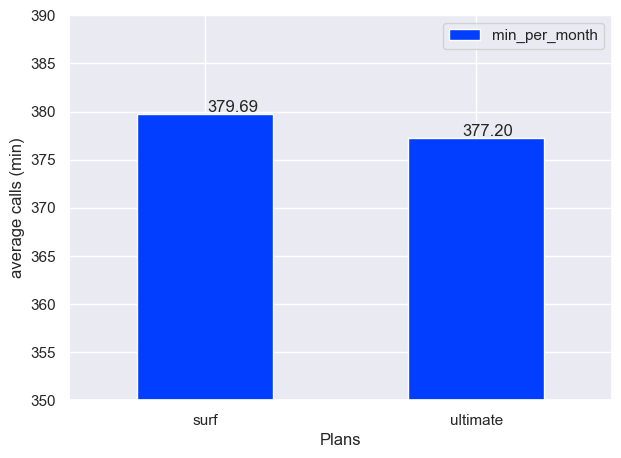

In [620]:
# compare the average call duration of each package per month.
# we will create a bar chart to visualize it.

# create a pivot table to summarize the average call duration dataset based on the type of package used
package_call = pd.pivot_table(user_usage, index = 'plan', values = 'min_per_month', aggfunc = 'mean')

# create a bar chart from a pivot table
package_call. plot(kind = 'bar',rot = 0,figsize=(7,5))

# defines the y-axis limits
plt.ylim(350,390)

# defines the x-axis and y-axis labels
plt.xlabel('Plans')
plt.ylabel('average calls (min)')

# create a label on the bar chart
plt.text(x=0.01,y=380,s='379.69')
plt.text(x=0.95,y=377.5,s='377.20')

# displays the bar chart
plt.show()

From the graph above it can be seen that `Surf Package` users have a slightly higher user call duration per month than `Ultimate Package` users with an average duration of `379.69 minutes (Surf)` and `377.20 minutes (Ultimate)` respectively.

Next, we will look at the distribution of user call duration per month per package using the histogram graph as follows:

In [621]:
# grouping package types for 'min_per_call' category for `surf` and `ultimate` package types
surf = user_usage[user_usage['plan'] == 'surf']
ultimate = user_usage[user_usage['plan'] == 'ultimate']

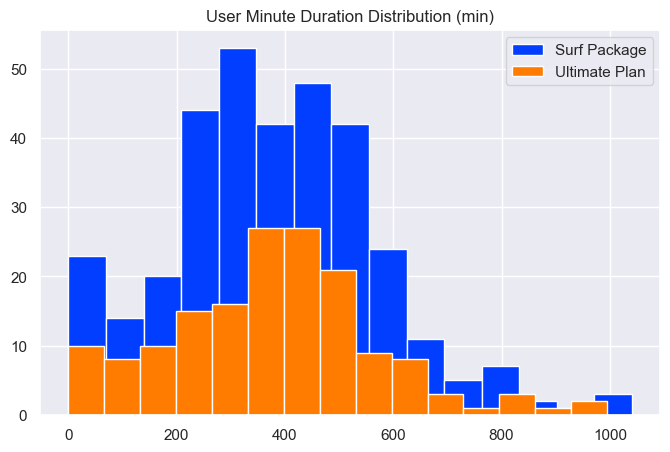

In [622]:
# compare the number of minutes needed by users of each plan per month.
# we will create a histogram.

# create a histogram of the `surf` package and the 'ultimate' package
surf['min_per_month'].hist(bins=15, label = 'Surf Package',figsize=(8,5))
ultimate['min_per_month'].hist(bins=15, label = 'Ultimate Plan')

# defines the histogram title
plt.title('User Minute Duration Distribution (min)')

# defines the location of the legend
plt.legend(loc='upper right')

# displays the histogram chart
plt.show()

The two histograms show that:
- For the `Surf Plan`, the distribution of data is spread over the range of `200 to 530 minutes` with peaks in the range of `300 minutes`.
- For the `Ultimate Plan`, the distribution of data is spread over the range of `370 to 430 minutes` with peaks in the range of `400 minutes`.
- The use of the `call` feature for the `surf` package is more frequently used than the `ultimate` package

In [623]:
# calculates the average and variance of the monthly call duration

# calculates the average
mean_surf_calls = surf['min_per_month'].mean()
mean_ultimate_calls = ultimate['min_per_month'].mean()

# displays the output
print('Average Call Duration Surf Plan Users\t :',f'{mean_surf_calls:.2f}','minutes')
print('Average Call Duration for Ultimate Plan Users :',f'{mean_ultimate_calls:.2f}','minutes')

Average Call Duration Surf Plan Users	 : 379.69 minutes
Average Call Duration for Ultimate Plan Users : 377.20 minutes


In [624]:
# calculate the variance
variance_surf_calls = np.var(surf[['min_per_month']])
variance_ultimate_calls = np.var(ultimate[['min_per_month']])

# extraction of value from variance
tmp_surf = variance_surf_calls['min_per_month']
tmp_ultimate = variance_ultimate_calls['min_per_month']

# displays the output
print('Surf Plan User Call Duration Variance\t  :',f'{tmp_surf:.2f}','minutes squared')
print('Ultimate Plan User Call Duration Variance :',f'{tmp_ultimate:.2f}','minutes squared')

Surf Plan User Call Duration Variance	  : 37357.58 minutes squared
Ultimate Plan User Call Duration Variance : 38073.64 minutes squared


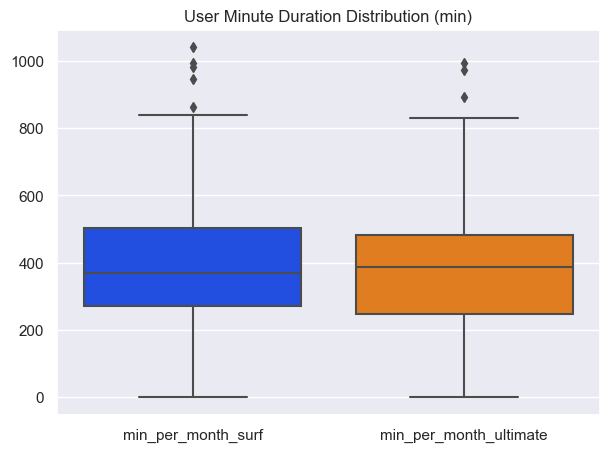

In [625]:
# Create a boxplot graph to visualize the distribution of monthly call durations

# Merge two dataframes `surf` and `ultimate` into one dataframe using the join method
merging_package = surf. join(ultimate,how='outer',lsuffix='_surf', rsuffix='_ultimate')

# displays the time duration boxplot based on the packages
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['min_per_month_surf','min_per_month_ultimate']])

# defines the histogram title
plt.title('User Minute Duration Distribution (min)')

# displays boxplots
plt.show()

From the average analysis, variance and boxplot visualization for each data package, it can be seen that the user's behavior towards `call duration` in `Surf Plan` has almost the same behavior as `Ultimate Plan` but the behavior of `Surf Plan` is more outperforms than the `Ultimate Plan`.

### Messaging/SMS <a id= 'cont_21' ></a>

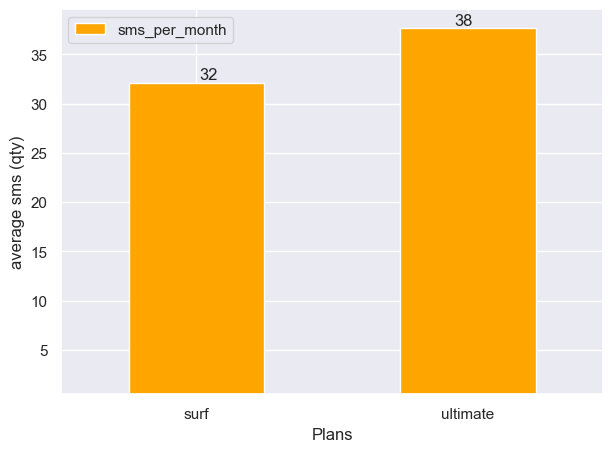

In [626]:
# compares the number of SMS that users tend to send per package per month

# create a pivot table to summarize the average number of SMS datasets based on the type of package used
package_sms = pd.pivot_table(user_usage, index = 'plan', values = 'sms_per_month', aggfunc = 'mean')

# create a bar chart from a pivot table
package_sms.plot(kind = 'bar',rot = 0,figsize=(7,5),color='orange')

# defines the y-axis limits
plt.ylim(0.50)

# defines the x-axis and y-axis labels
plt.xlabel('Plans')
plt.ylabel('average sms (qty)')

# create a label on the bar chart
plt.text(x=0.01,y=32.5,s='32')
plt.text(x=0.95,y=38,s='38')

# displays the bar chart
plt.show()

From the graph above it can be seen that `Ultimate Plan` users have a higher number of SMS users per month than `Surf Plan` users with an average number of `32 qty (Surf)` and `38 qty (Ultimate)` respectively. .

Next, we will see the distribution of the number of SMS users per month per package using the histogram graph as follows:

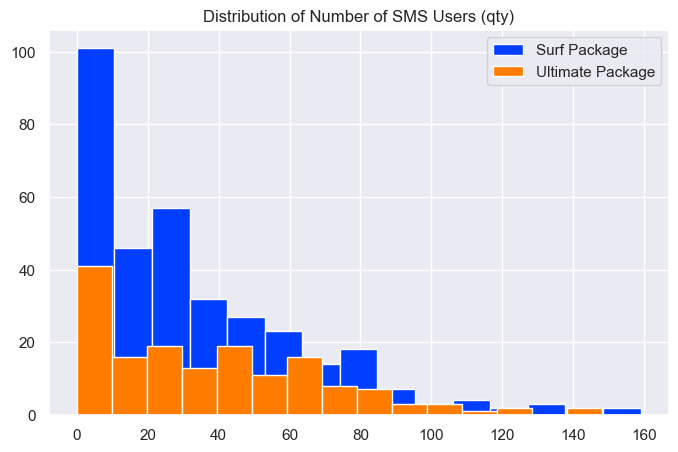

In [627]:
# compare the number of sms needed by users of each package per month.
# we will create a histogram.

# create a histogram of the `surf` plan and the 'ultimate' plan
surf['sms_per_month'].hist(bins=15, label = 'Surf Package',figsize=(8,5))
ultimate['sms_per_month'].hist(bins=15, label = 'Ultimate Package')

# defines the histogram title
plt.title('Distribution of Number of SMS Users (qty)')

# defines the location of the legend
plt.legend(loc='upper right')

# displays the histogram chart
plt.show()

The two histograms show that:
- The `Surf Plan` and `Ultimate Plan` have a distribution of the number of sms spread over the range of `0 to 30 qty` with the peak being in the range of `5 qty`.
- Both histograms show that not many users frequently use `SMS` where the graph slopes to the right.
- The use of the `sms` feature for the `surf` package is more frequently used than the `ultimate` plan

In [628]:
# calculates the average and variance of the number of monthly sms

# calculates the average
mean_surf_sms = surf['sms_per_month'].mean()
mean_ultimate_sms = ultimate['sms_per_month'].mean()

# displays the output
print('Average SMS Surf Plan Users :',f'{mean_surf_sms:.2f}','sms')
print('Average SMS for Ultimate Plan Users :',f'{mean_ultimate_sms:.2f}','sms')

Average SMS Surf Plan Users : 32.11 sms
Average SMS for Ultimate Plan Users : 37.70 sms


In [629]:
# calculate the variance
variance_surf_sms = np.var(surf[['sms_per_month']])
variance_ultimate_sms = np.var(ultimate[['sms_per_month']])

# extraction of value from variance
tmp_surf = variance_surf_sms['sms_per_month']
tmp_ultimate = variance_ultimate_sms['sms_per_month']

# displays the output
print('Surf Plan User SMS Variance :',f'{tmp_surf:.2f}','qty squared')
print('Ultimate Plan User SMS Variance :',f'{tmp_ultimate:.2f}','qty squared')

Surf Plan User SMS Variance : 963.40 qty squared
Ultimate Plan User SMS Variance : 1086.56 qty squared


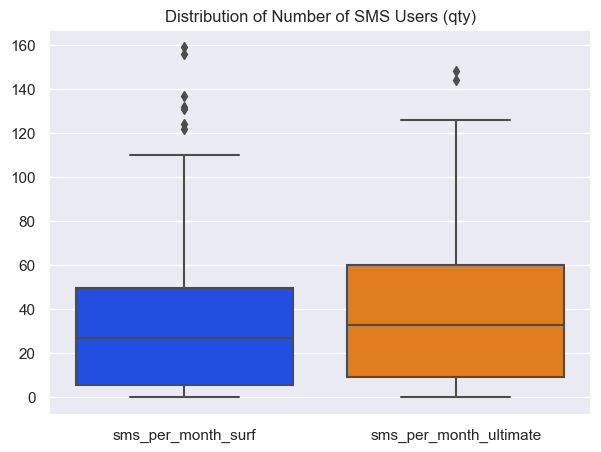

In [630]:
# create a boxplot graph to visualize the distribution of the number of monthly sms

# displays the boxplot of the number of sms based on the packages
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['sms_per_month_surf','sms_per_month_ultimate']])

# defines the title of the boxplot
plt.title('Distribution of Number of SMS Users (qty)')

# displays boxplots
plt.show()

From the analysis of the average, variance and boxplot visualization for each data package, it can be seen that the user's behavior towards the `number of sms` in `Surf Plan` has a `different` behavior from the `Ultimate Plan` behavior where the data distribution is in a different place. The `Ultimate Plan` has a higher value when compared to the `Surf Plan`.

### Internet <a id= 'cont_22' ></a>

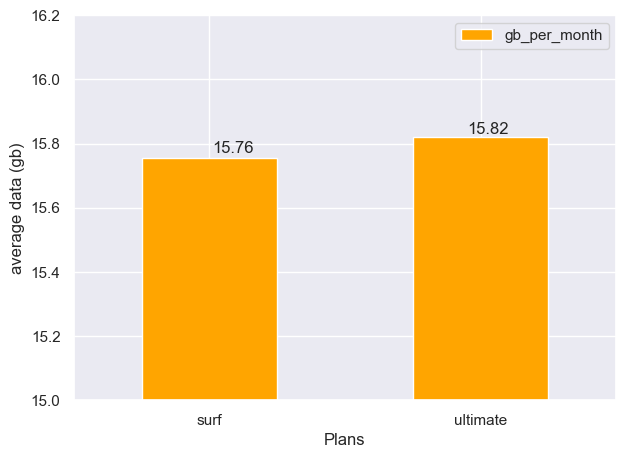

In [631]:
# compares the amount of data users tend to send per plan per month

# create a pivot table to summarize the average dataset amount of data based on the type of package used
package_internet = pd.pivot_table(user_usage, index = 'plan', values = 'gb_per_month', aggfunc = 'mean')

# create a bar chart from a pivot table
package_internet.plot(kind = 'bar',rot = 0,figsize=(7,5),color='orange')

# defines the y-axis limits
plt.ylim(15,16.2)

# defines the x-axis and y-axis labels
plt.xlabel('Plans')
plt.ylabel('average data (gb)')

# create a label on the bar chart
plt.text(x=0.01,y=15.77,s='15.76')
plt.text(x=0.95,y=15.83,s='15.82')

# displays the bar chart
plt.show()

From the graph above it can be seen that `Ultimate Plan` users have a slightly higher amount of internet data users per month than `Surf Plan` users with an average size of `15.76 Gb (Surf)` and `15.82 Gb (Ultimate)`.

Next, we will look at the distribution of the amount of internet data users per month per package using the histogram graph as follows:

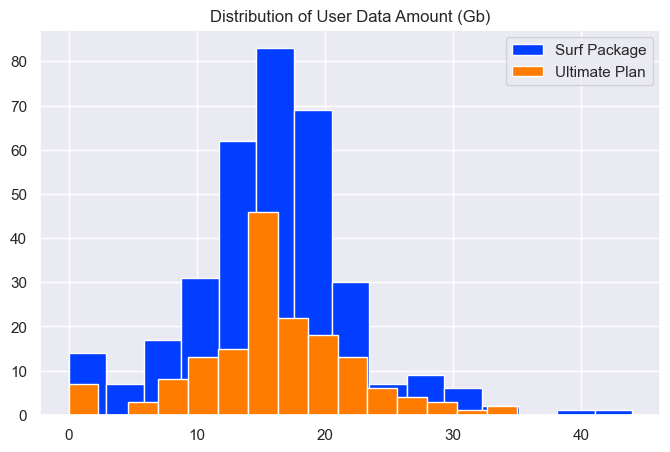

In [632]:
# compare the amount of data needed by users of each package per month.
# we will create a histogram.

# create a histogram of the `surf` plan and the 'ultimate' plan
surf['gb_per_month'].hist(bins=15, label = 'Surf Package', figsize=(8,5))
ultimate['gb_per_month'].hist(bins=15, label = 'Ultimate Plan')

# defines the histogram title
plt.title('Distribution of User Data Amount (Gb)')

# defines the location of the legend
plt.legend(loc='upper right')

# displays the histogram chart
plt.show()

The two histograms show that:
- The `Surf Plan` has a data distribution spread over the range of `12 to 20.5 Gb` with peaks in the `15 Gb` range.
- The `Ultimate Plan` has a data distribution spread over the range of `14 to 21 Gb` with peaks in the `15 Gb` range.
- Use of the `Amount of Internet Data` feature for the `surf` plan is used more frequently than the `ultimate` plan

In [633]:
# calculates the average and variance of the monthly (gb) amount of data

# calculates the average
mean_surf_internet = surf['gb_per_month'].mean()
mean_ultimate_internet = ultimate['gb_per_month'].mean()

# displays the output
print('Average Number of Internet Data Surf Plan Users :',f'{mean_surf_internet:.2f}','gb')
print('Average Amount of Internet Data for Ultimate Plan Users :',f'{mean_ultimate_internet:.2f}','gb')

Average Number of Internet Data Surf Plan Users : 15.76 gb
Average Amount of Internet Data for Ultimate Plan Users : 15.82 gb


In [634]:
# calculate the variance
variance_surf_gb = np.var(surf[['gb_per_month']])
variance_ultimate_gb = np.var(ultimate[['gb_per_month']])

# extraction of value from variance
tmp_surf = variance_surf_gb['gb_per_month']
tmp_ultimate = variance_ultimate_gb['gb_per_month']

# displays the output
print('Variance of Amount of Internet Data Surf Plan Users :',f'{tmp_surf:.2f}','gb squared')
print('Variance of Amount of Internet Data Ultimate Plan Users :',f'{tmp_ultimate:.2f}','gb squared')

Variance of Amount of Internet Data Surf Plan Users : 40.72 gb squared
Variance of Amount of Internet Data Ultimate Plan Users : 38.64 gb squared


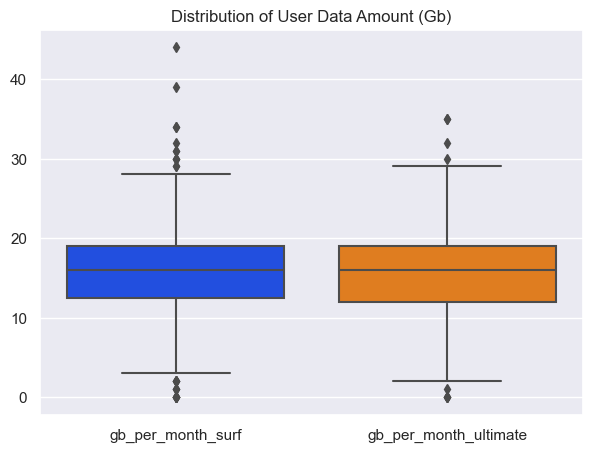

In [635]:
# create a boxplot graph to visualize the monthly distribution of the amount of data (gb).

# displays the boxplot of the number of sms based on the packages
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['gb_per_month_surf','gb_per_month_ultimate']])

# defines the title of the boxplot
plt.title('Distribution of User Data Amount (Gb)')

# displays boxplots
plt.show()

From the analysis of the average, variance and boxplot visualization for each data package, it can be seen that the user's behavior towards the 'amount of internet data' in the 'Surf Plan' has a slightly 'different' behavior from the behavior of the 'Ultimate Plan' where the data distribution is in the same place. slightly different. The `Ultimate Plan` has a higher value when compared to the `Surf Plan`.

## Income <a id= 'cont_23' ></a>

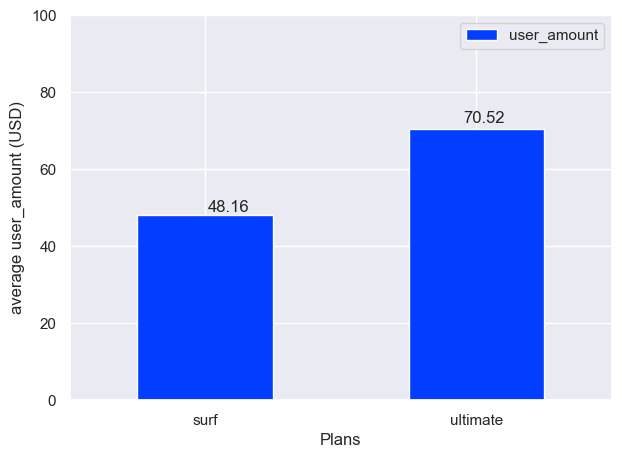

In [636]:
# compare the amount of income from users of each package per month

# create a pivot table to summarize the average income dataset based on the type of package used
package_amount = pd.pivot_table(user_usage, index = 'plan', values = 'user_amount', aggfunc = 'mean')

# create a bar chart from a pivot table
package_amount.plot(kind = 'bar',rot = 0, figsize=(7,5))

# defines the y-axis limits
plt.ylim(0,100)

# defines the x-axis and y-axis labels
plt.xlabel('Plans')
plt.ylabel('average user_amount (USD)')

# create a label on the bar chart
plt.text(x=0.01,y=49,s='48.16')
plt.text(x=0.95,y=72,s='70.52')

# displays the bar chart
plt.show()

From the graph above it can be seen that `Ultimate Plan` users provide a higher amount of income from users per month than `Surf Plan` users with an average amount of income of `48.16 USD (Surf)` and `70.52 USD (Ultimate) respectively.`.

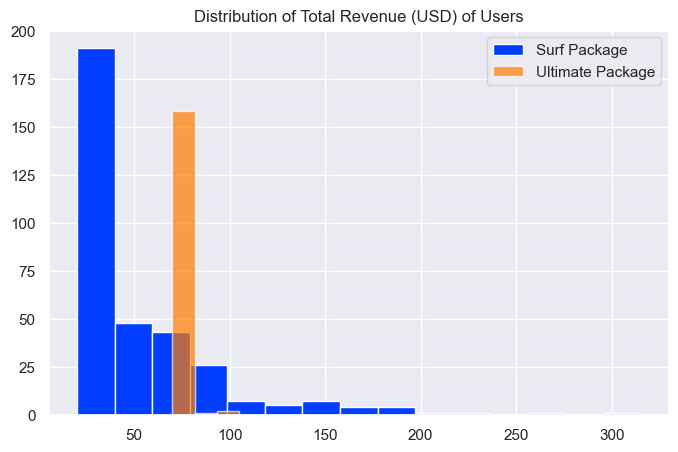

In [637]:
# compare the amount of income from users of each package per month.
# we will create a histogram.

# create a histogram of the `surf` plan and the 'ultimate' plan
surf['user_amount'].hist(bins=15, label = 'Surf Package',figsize=(8,5))
ultimate['user_amount'].hist(bins=3, label = 'Ultimate Package', alpha = 0.7)

# defines the histogram title
plt.title('Distribution of Total Revenue (USD) of Users')

# defines the location of the legend
plt.legend(loc='upper right')

# displays the histogram chart
plt.show()

The two histograms show that:
- The `Surf Plan` has a data distribution that is spread over the range of `23 to 75 USD` with a peak in the range of `25 USD`.
- For the `Ultimate Plan` it has a centralized distribution of data in the range of `70 USD`.
- The use of `Plan Type` for the `surf` plan is more often used than for the `ultimate` plan
- Both charts have a sloping shape to the right `(Positive Skew)`.

In [638]:
# calculates the average and variance of the total revenue of monthly subscribers

# calculates the average
mean_surf_amount = surf['user_amount'].mean()
mean_ultimate_amount = ultimate['user_amount'].mean()

# displays the output
print('Average Amount of Income from Surf Plan Users :',f'{mean_surf_amount:.2f}','USD')
print('Average Total Income of Ultimate Plan Users :',f'{mean_ultimate_amount:.2f}','USD')

Average Amount of Income from Surf Plan Users : 48.16 USD
Average Total Income of Ultimate Plan Users : 70.52 USD


In [639]:
# calculate the variance
variance_surf_amount = np.var(surf[['user_amount']])
variance_ultimate_amount = np.var(ultimate[['user_amount']])

# extraction of value from variance
tmp_surf = variance_surf_amount['user_amount']
tmp_ultimate = variance_ultimate_amount['user_amount']

# displays the output
print('Variance of Total Revenue from Surf Plan Users :',f'{tmp_surf:.2f}','USD squared')
print('Variance of Total Earnings of Ultimate Plan Users :',f'{tmp_ultimate:.2f}','USD squared')

Variance of Total Revenue from Surf Plan Users : 1777.84 USD squared
Variance of Total Earnings of Ultimate Plan Users : 16.16 USD squared


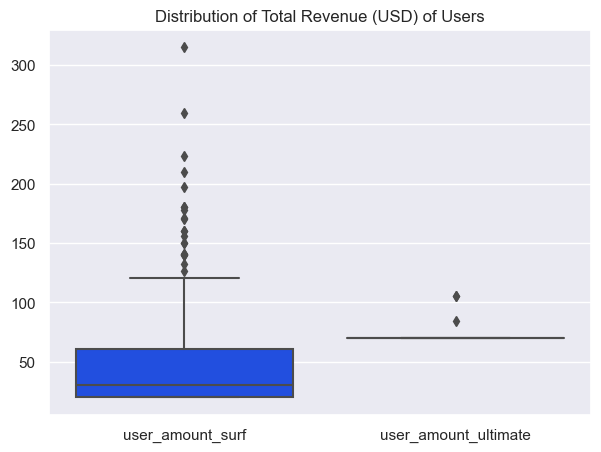

In [640]:
# create a boxplot graph to visualize the distribution of the amount of income from monthly subscribers

# displays the boxplot of the number of sms based on the packages
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['user_amount_surf','user_amount_ultimate']])

# defines the title of the boxplot
plt.title('Distribution of Total Revenue (USD) of Users')

# displays boxplots
plt.show()

From the analysis of the average, variance and visualization of the boxplot for each user's income, it can be seen that the monthly income from the `surf` plan and the `ultimate` plan provide different income results, whereas the `ultimate` plan provides a higher monthly income compared to the revenue from the `surf` plan.

## Testing Statistical Hypotheses <a id= 'cont_24' ></a>

### Hypothesis Testing 1: The Average Income of Ultimate and Surf Prepaid Package Users is Different <a id= 'cont_25' ></a>

Next we will test a hypothesis which states that `The Average Revenue of Ultimate and Surf Prepaid Package Users is Different`. Let's summarize the hypothesis as follows:
- The Null Hypothesis: `The Average Revenue of Ultimate and Surf Prepaid Package Users is the Same`
- Alternative Hypothesis: `The Average Revenue of Ultimate and Surf Prepaid Package Users Is Different`

Let's test using the `scipy` library.

In [641]:
# test hypothesis 1:
# define a significance of 5%
alpha = 0.05

# test whether the revenue on the `surf` plan and the `ultimate` plan are the same using `ttest_ind`
results = st.ttest_ind(surf['user_amount'],ultimate['user_amount'],equal_var=False)

# display p-values
print('p-value',results.pvalue)

# Hypothesis test
if results.pvalue < alpha:
     # alternative hypothesis = "The Average Revenue of Ultimate and Surf Prepaid Package Users is Different"
     print('We reject the null hypothesis')
else:
     # null hypothesis = "The Average Revenue of Ultimate and Surf Prepaid Package Users is the Same"
     print('We cannot reject the null hypothesis')

p-value 9.973982812516387e-20
We reject the null hypothesis


The results of hypothesis testing show `'Rejection of the Null Hypothesis'` where `'Alternative Hypothesis Approved'` which means that `"The average income of Ultimate and Surf Prepaid Package Users is different"`. This is in accordance with the analysis of revenue from users in the previous discussion that `'Revenue from the Ultimate Package is Bigger than the Surf Package'`.

### Hypothesis 2 Test: The Average Revenue of Users in the NY-NJ Region Is Different from the Earnings of Users from Other Regions <a id= 'cont_26' ></a>

Next we will test a hypothesis which states that 'The Average Revenue of Users in the NY-NJ Region Differs from the Earnings of Users from Other Regions'. Let's summarize the hypothesis as follows:
- Null Hypothesis: `The Average Revenue of Users in the NY-NJ Region is the Same as Other Areas`
- Alternative Hypothesis: `The Average Revenue of Users in the NY-NJ Region is Different from Other Regions`

Let's test using the `scipy` library.

In [642]:
# membuat filter pendapatan berdasarkan region 'NY-NJ' dengan region 'other'
ny_nj_amount = user_usage[user_usage['region'] == 'NY-NJ']
other_amount = user_usage[user_usage['region'] == 'other']

In [643]:
# test hypothesis 2:
# define a significance of 5%
alpha = 0.05

# test whether revenues in `NY-NJ` region and `Other` region are equal using `ttest_ind`
results = st.ttest_ind(ny_nj_amount['user_amount'],other_amount['user_amount'],equal_var=False)

# display p-values
print('p-value',results.pvalue)

# Hypothesis test
if results.pvalue < alpha:
     # alternative hypothesis = "The Average Revenue of Users in NY-NJ Region is Different from Other Regions"
     print('We reject the null hypothesis')
else:
     # null hypothesis = "The Average Revenue of Users in NY-NJ Region is the Same as Other Areas"
     print('We cannot reject the null hypothesis')

p-value 0.4268835575367236
We cannot reject the null hypothesis


The results of hypothesis testing show `'We cannot reject the Null Hypothesis'` where `'Alternative Hypothesis Rejected'` which means that `"The Average Income of Users in the NY-NJ Region with Other Regions is the Same"`.

## General Conclusion <a id= 'cont_27' ></a>

To find out which Prepaid Package is better (more profitable), some analysis is needed starting from data preparation to the analysis itself. If possible, it is necessary to test the hypothesis as was done in this project. The preparation stage starts with checking several data samples in each dataframe. `Megaline` contains several dataframes including `'calls'`, `'internet'`, `'messages'`, `'plans'` and `'users'` which all contain important information for the analysis of this project.

The first stage of data processing is to check whether the `data type` is as expected, then proceed by checking `missing values and overcoming`, `checking data duplication`, and enriching the data by separating `datetime` into respective columns namely `day `, `month` and `year`.

After the `cleanup data` process is followed by `data aggregation` to facilitate analysis, then analysis of user behavior by category `(call duration, number of sms, amount of internet data and amount of income)` is carried out starting from making `histogram` and `boxplot`. Then proceed with hypothesis testing such as testing the similarity of data between the prepaid packages and finally concluding.

The following are some conclusions obtained from the analysis of prepaid packages including:
- In the behavior of the user's `call duration` where the `Prepaid Surf Package` outperforms the average call duration of `379.69 mins` spread between `200 to 530 minutes` compared to the `Ultimate Prepaid Package` of `377.20 mins` which spread between `370 to 430 minutes`.
- In the behavior of `the number of sms` users where `Ultimate Prepaid Package` outperforms in average the number of sms of `38 qty` compared to `32 qty` of `Surf Prepaid Package, both packages have data distribution around `0 to 30 qty`.
- In the behavior of `amount of internet data` users where `Ultimate Prepaid Package` and `Surf Prepaid Package` have almost the same average amount of data usage, however `Ultimate Prepaid Package` outperforms slightly in average amount of data usage of ` 15.82 Gb` spread over `14 to 21 Gb` compared to `15.76 Gb` `Surf Prepaid Package` spread between `12 to 20.5 Gb`.
- In the behavior of `total income per month` from users where `Ultimate Prepaid Package` outperforms the average amount of income per month of `70.52 USD` spread over the range of `70 USD` compared to `Prepaid Surf Package` of `48.16 USD` which has a data distribution of around `23 to 75 USD`.
- Testing the first hypothesis `"The Average Income of Ultimate and Surf Prepaid Package Users is Different"` shows that the null hypothesis: `"The Average Income of Ultimate and Surf Prepaid Package Users is the Same"` is rejected, so the alternative hypothesis: `"Revenue The average number of Users of Ultimate and Surf Different Prepaid Packages received"`.
- Testing of the second hypothesis `"The Average Revenue of Users in the NY-NJ Region is Different from Other Regions"` shows that the null hypothesis: `"The Average Revenue of Users in the NY-NJ Region is the Same as Other Regions is the Same"` is not can be rejected, so the alternative hypothesis: `"The Average Revenue of Users in the NY-NJ Region is Different from Other Regions"` is rejected.

From the description above, it shows that the `Ultimate Prepaid Package` provides more `"More Income"` and also a lot of user interest, especially `number of sms` and `data package`.